In [117]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from tqdm import tqdm

In [118]:
# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

En este laboratorio, partiremos de los datos con encoding y vamos a aplicar alguno de los métodos estudidados de cross validation, esperando así mejorar los resultados obtenidos en el laboratorio de regresion con el training y el test de una sola iteración.

In [119]:
df = pd.read_csv("datos/encoding.csv", index_col=0)

In [120]:
df.head()

,postalCode,price,powerCV_robust,kilometer_robust,seller,offerType,abtest,vehicleType,yearOfRegistration,gearbox,monthOfRegistration,fuelType,brand,notRepairedDamage
0,70435,480.0,-0.374913,0.0,5919.340419,5919.324221,5950.394844,5182.351533,2204.474969,4746.972781,4472.671667,5038.059231,5273.200085,3397.321601
1,66954,18300.0,1.128683,-1.0,5903.443396,5903.511051,5926.562881,12127.563144,7239.785288,4734.577120,6037.628327,8537.138905,8828.247228,2303.964735
2,90480,9800.0,0.746735,-1.0,5903.443396,5903.511051,5926.562881,13305.266694,7239.785288,10585.224181,6050.044119,8537.138905,12561.257062,3374.390103
3,91074,1500.0,-0.531319,0.0,5903.443396,5903.511051,5926.562881,2777.701282,7239.785288,4734.577120,6198.748774,5011.562951,5271.489409,7092.000540
4,60437,3600.0,-0.619461,-2.4,5916.765237,5916.724803,5958.128460,2778.258257,7246.674406,4756.336114,6710.554236,8521.338650,6409.241600,7117.079385


In [121]:
X = df.drop(columns="price")
y = df[["price"]]

In [122]:
modelo_lineal = LinearRegression()

Aplicamos el algoritmo Kfold, como creamos lotes y iteramos de manera que todos los datos pasen por test esperamos obtener resultados mejores que los que obtuvimos ayer para un número de lotes lo suficientemente alto. Empezamos, haciendo 5 lotes.

In [123]:
kf = KFold(n_splits=5, 
           shuffle=True, 
           random_state=42)

# RMSE
score_rmse = cross_val_score(modelo_lineal, 
                             X, 
                             y, 
                             cv=kf, 
                             scoring="neg_root_mean_squared_error")
rmse = abs(np.mean(score_rmse))

# MSE
score_mse = cross_val_score(modelo_lineal, 
                            X, 
                            y, 
                            cv=kf, 
                            scoring="neg_mean_squared_error")
mse = abs(np.mean(score_mse))

# MAE
score_mae = cross_val_score(modelo_lineal, 
                            X, 
                            y, 
                            cv=kf, 
                            scoring="neg_mean_absolute_error")
mae = abs(np.mean(score_mae))

# R^2
score_r2 = cross_val_score(modelo_lineal, 
                           X, 
                           y, 
                           cv=kf, 
                           scoring="r2")
r2 = np.mean(score_r2)

In [124]:
metricas_kfold = {'kf': {
        'r2_score': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse}
}

In [125]:
pd.DataFrame(metricas_kfold).T

,r2_score,MAE,MSE,RMSE
kf,0.298227,3402.036369,1.022314e+08,10094.219753


Comparemos esto con los datos obtenidos en el train y en el test en el laboratorio anterior
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>r2_score</th>
      <th>MAE</th>
      <th>MSE</th>
      <th>RMSE</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>train</th>
      <td>0.291759</td>
      <td>3388.629892</td>
      <td>1.033683e+08</td>
      <td>10167.020208</td>
    </tr>
    <tr>
      <th>test</th>
      <td>0.307367</td>
      <td>3398.433385</td>
      <td>9.953051e+07</td>
      <td>9976.497826</td>
    </tr>
  </tbody>
</table>
</div>

Vemos que los datos apenas mejoran los del train, y son peores que los del test. Vamos a subir el numero de lotes.

Vamos a aplicarlo ahora para 100 lotes

In [126]:
kf = KFold(n_splits= 1000, 
           shuffle=True, 
           random_state=42)

# RMSE
score_rmse = cross_val_score(modelo_lineal, 
                             X, 
                             y, 
                             cv=kf, 
                             scoring="neg_root_mean_squared_error")
rmse = abs(np.mean(score_rmse))

# MSE
score_mse = cross_val_score(modelo_lineal, 
                            X, 
                            y, 
                            cv=kf, 
                            scoring="neg_mean_squared_error")
mse = abs(np.mean(score_mse))

# MAE
score_mae = cross_val_score(modelo_lineal, 
                            X, 
                            y, 
                            cv=kf, 
                            scoring="neg_mean_absolute_error")
mae = abs(np.mean(score_mae))

# R^2
score_r2 = cross_val_score(modelo_lineal, 
                           X, 
                           y, 
                           cv=kf, 
                           scoring="r2")
r2 = np.mean(score_r2)

In [127]:
metricas_kfold = {'kf': {
        'r2_score': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse}
}

In [128]:
pd.DataFrame(metricas_kfold).T

,r2_score,MAE,MSE,RMSE
kf,0.508599,3401.781729,1.022455e+08,7235.589962


Comparemos esto con los datos obtenidos en el train y en el test en el laboratorio anterior
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>r2_score</th>
      <th>MAE</th>
      <th>MSE</th>
      <th>RMSE</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>train</th>
      <td>0.291759</td>
      <td>3388.629892</td>
      <td>1.033683e+08</td>
      <td>10167.020208</td>
    </tr>
    <tr>
      <th>test</th>
      <td>0.307367</td>
      <td>3398.433385</td>
      <td>9.953051e+07</td>
      <td>9976.497826</td>
    </tr>
  </tbody>
</table>
</div>

In [129]:
df[["price"]].describe()

,price
count,371528.000000
mean,5923.847881
std,12053.036525
min,1.000000
25%,1250.000000
50%,3000.000000
75%,7300.000000
max,999999.000000


Aunque los datos son mejores que los del modelo del laboratorio anterior, siguen siendo malos, baste ver el RMSE obtenido con el precio medio de los coches. Teneos un RMSE mayor que lo que cuesta un coche de mierda.

En todo caso, el kfolds no es el modelo más adeucado para trabajar con los datos de nuestro laboratorio, dado que no se dan condiciones de independencia, normalidad y homoestaticidad y lo mismo pasaría con el LeaveOneOut que además tardará bastante en ejecutarse. Pasamos pues al decision tree.

## Decision tree

In [133]:
def metricas(y_train, y_train_pred, y_test, y_test_pred):
    metricas = {
        'train': {
            'r2_score': r2_score(y_train, y_train_pred),
            'MAE': mean_absolute_error(y_train, y_train_pred),
            'MSE': mean_squared_error(y_train, y_train_pred),
            'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
        },
        'test': {
            'r2_score': r2_score(y_test, y_test_pred),
            'MAE': mean_absolute_error(y_test, y_test_pred),
            'MSE': mean_squared_error(y_test, y_test_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

        }
    }
    return pd.DataFrame(metricas).T

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)


In [ ]:
np.set_printoptions(suppress= True)
# Establecemos un diccionario con los hiperparámetros
params_arbol = {
    'max_depth': [12,13,14, 15],
    'min_samples_split': [15, 20, 25,30],
    'min_samples_leaf': [20,30,40],
    'max_leaf_nodes': [1000, 1050, 1100, 1150]
}

In [163]:
grid_search_arbol = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid= params_arbol,
                                 cv = 5, 
                                 scoring = "neg_mean_squared_error", 
                                 n_jobs = -1) 
grid_search_arbol.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [12, 13, 14],
                         'max_leaf_nodes': [1000, 1050, 1100, 1150],
                         'min_samples_leaf': [20, 30, 40],
                         'min_samples_split': [15, 20, 25]},
             scoring='neg_mean_squared_error')

In [168]:
modelo_final_arbol = grid_search_arbol.best_estimator_
modelo_final_arbol

DecisionTreeRegressor(max_depth=14, max_leaf_nodes=1150, min_samples_leaf=30,
                      min_samples_split=25)

In [169]:
y_pred_test = modelo_final_arbol.predict(X_test)
y_pred_train = modelo_final_arbol.predict(X_train)

In [170]:
df_metricas_arbol = metricas(y_train, y_pred_train, y_test, y_pred_test)
df_metricas_arbol

,r2_score,MAE,MSE,RMSE
train,0.478789,2099.034852,7.607119e+07,8721.879725
test,0.489177,2188.633444,7.340472e+07,8567.655655


Mejoramos resultados con respecto al kfolds, pero claramente  siguen siendo resultados muy malos, seguimos teniendo un RMSE superior al precio medio de los coches. Como el que no se consuela es porque no quiere, al menos los resultados son muy similares en todas las métricas entre train y test. Esto es síntoma de que no hay overfitting.

In [158]:
pd.DataFrame(grid_search_arbol.cv_results_).sort_values(by="rank_test_score", ascending=True).head(2)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
132,2.888984,0.063689,0.023347,0.002563,14,1100,30,20,"{'max_depth': 14, 'max_leaf_nodes': 1100, 'min...",-8.168764e+07,-7.786219e+07,-5.804553e+07,-1.436835e+08,-7.306014e+07,-8.686781e+07,2.952063e+07,1
133,2.915511,0.044035,0.025936,0.004042,14,1100,30,25,"{'max_depth': 14, 'max_leaf_nodes': 1100, 'min...",-8.169689e+07,-7.786004e+07,-5.804553e+07,-1.436835e+08,-7.306014e+07,-8.686923e+07,2.952044e+07,2


In [171]:
df_resultados_arbol = pd.DataFrame(grid_search_arbol.cv_results_)
df_resultados_arbol_filtrado = df_resultados_arbol.filter(like="param").drop(columns = "params")
df_resultados_arbol_filtrado["MSE"] = df_resultados_arbol["mean_test_score"]
df_resultados_arbol_filtrado.head(2)

,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
0,12,1000,20,15,-8.774423e+07
1,12,1000,20,20,-8.774423e+07


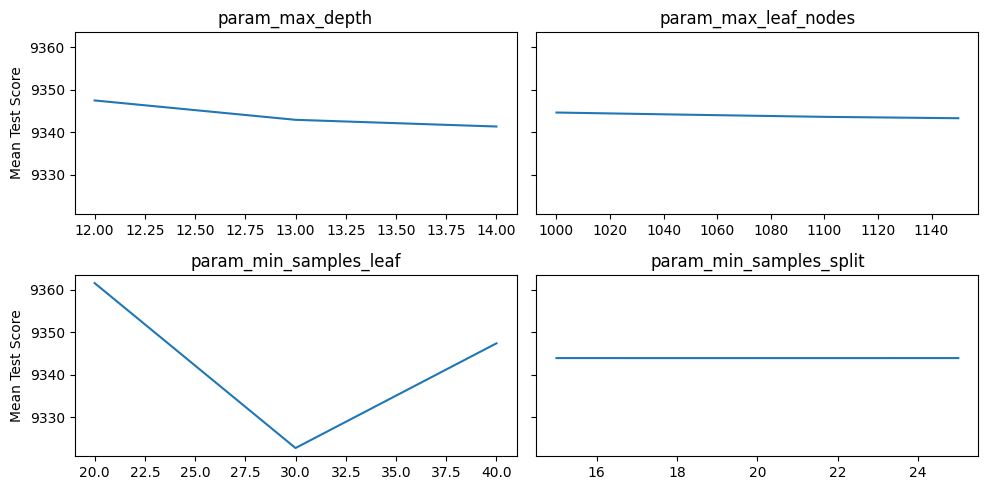

In [173]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado.columns[:-1]):
    df_rmse_prof = (
        np.sqrt(df_resultados_arbol_filtrado.groupby(column)["MSE"].mean().abs())
        .reset_index()
    )
    
    sns.lineplot(
        x=df_rmse_prof[column],
        y=df_rmse_prof["MSE"],
        ax=axes[indice]    
    )
    
    axes[indice].set_title(f"{column}")
    axes[indice].set_xlabel("")
    axes[indice].set_ylabel("Mean Test Score")

plt.tight_layout()
plt.show()

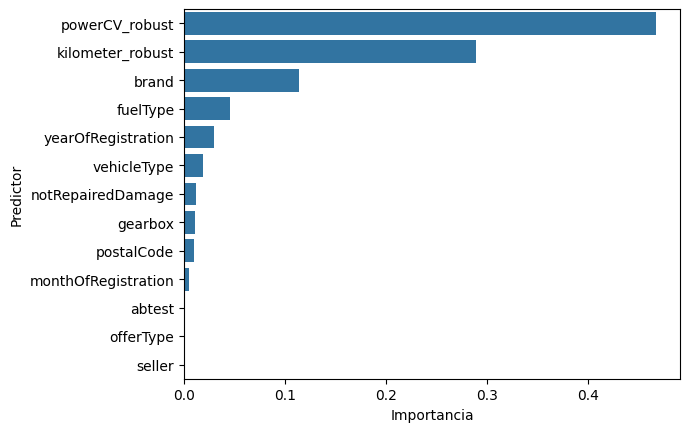

In [174]:
importancias = modelo_final_arbol.feature_importances_
importancia_rf = pd.DataFrame({"Predictor": X_train.columns, "Importancia": importancias})
importancia_rf = importancia_rf.sort_values(by="Importancia", ascending=False)
sns.barplot(y = "Predictor", x = "Importancia", data = importancia_rf);

En las importancias de las columnas vemos que abtest offerType y seller que fueron las tres columnas que en el procesamiento de las categoricas nos dieron en el test A/B que no había diferencias significativas no tienen importancia como preditoras en nuestro modelo, así queen proximos modelos no las incluiremos